In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [8]:
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D, GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from scipy import stats

In [9]:
pip install pyedflib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



Extracting EDF parameters from C:\Users\Karthick\Desktop\bbkk\dataset\dataverse_files\s06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184999  =      0.000 ...   739.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-10-23 14:10:17 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
 subject_info: 1 item (dict)
>
Using matplotlib as 2D backend.


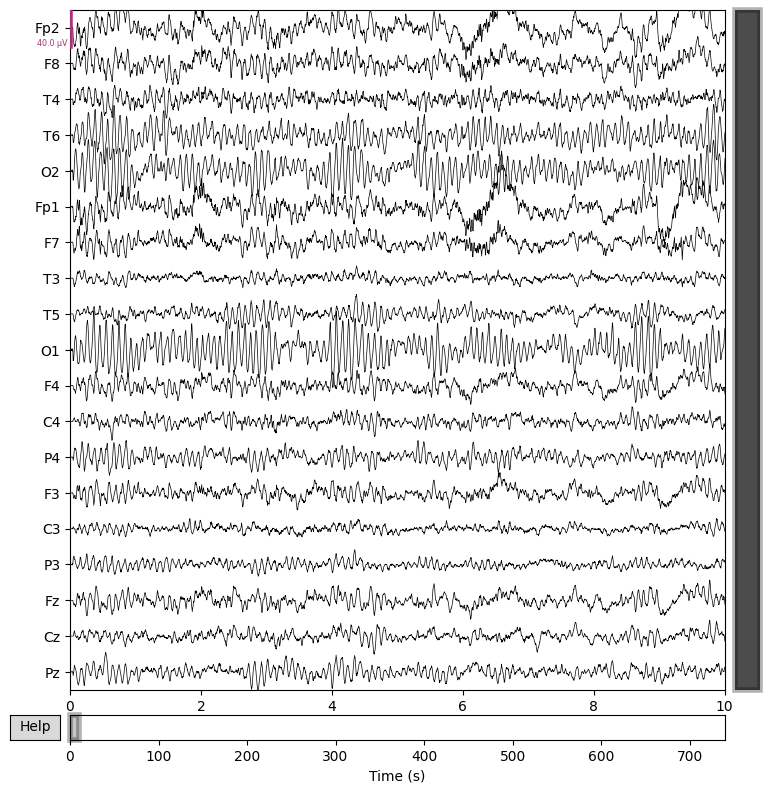

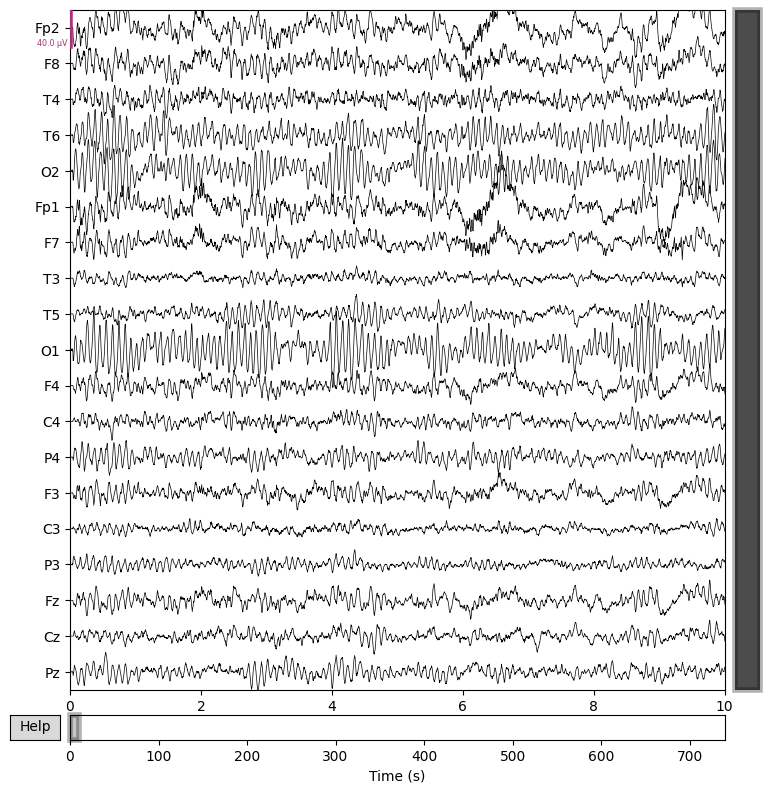

In [4]:
edf_file_path = 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files/s06.edf'
raw = mne.io.read_raw_edf(edf_file_path, preload=True)
print(raw.info)
raw.plot()

Extracting EDF parameters from C:\Users\Karthick\Desktop\bbkk\dataset\dataverse_files\h06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 232499  =      0.000 ...   929.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-06-25 19:38:48 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
 subject_info: 1 item (dict)
>


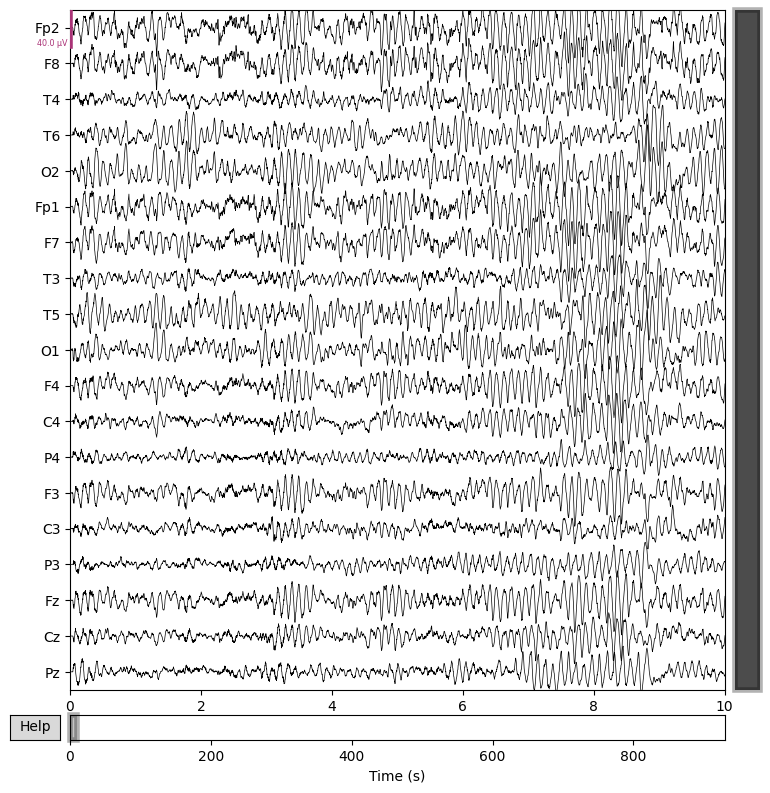

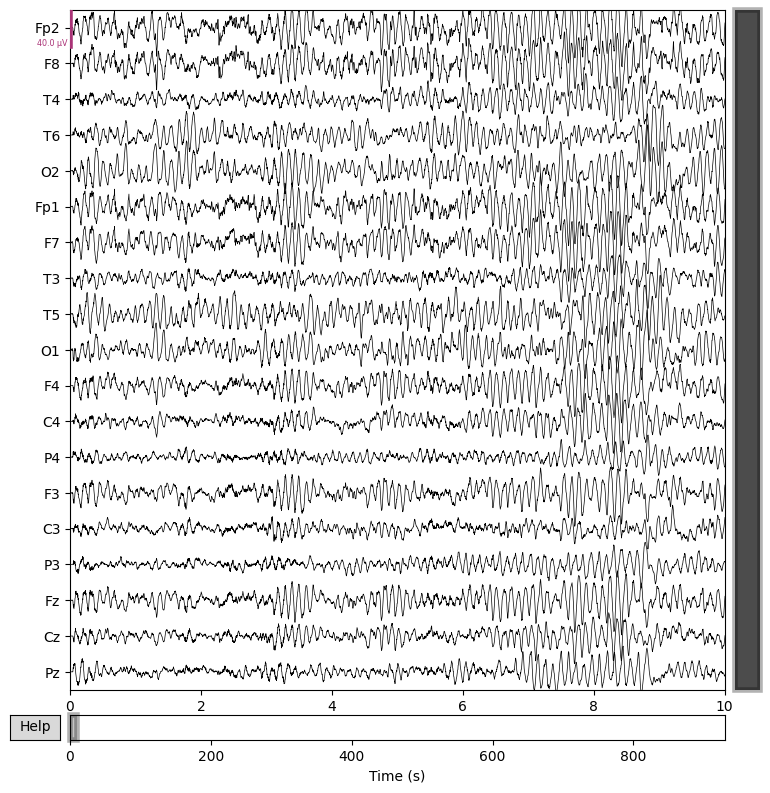

In [5]:
edf_file_path = 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files//h06.edf'
raw = mne.io.read_raw_edf(edf_file_path, preload=True)
print(raw.info)
raw.plot()

In [6]:
from glob import glob
import os

# Assuming all_files_path is a list of file paths
all_files_path = glob('C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files//*.edf')

# Generate lists of file paths for healthy and patient data
healthy_file_path = [i for i in all_files_path if 'h' in os.path.split(i)[1]]
patient_file_path = [i for i in all_files_path if 's' in os.path.split(i)[1]]

print("Healthy File Paths:")
print(healthy_file_path)
print("\nPatient File Paths:")
print(patient_file_path)


Healthy File Paths:
['C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h01.edf', 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h02.edf', 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h03.edf', 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h04.edf', 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h05.edf', 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h06.edf', 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h07.edf', 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h08.edf', 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h09.edf', 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h10.edf', 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h11.edf', 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h12.edf', 'C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files\\h13.edf', 'C:\\Users\\Karthick\\Desktop\

In [7]:
def plot_spectrogram(data, title):
    fs = 1000  # Sample rate (adjust as per your data)
    f, t, Sxx = spectrogram(data, fs)
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx[0]), shading='gouraud')  # Assuming Sxx[0] contains spectrogram data for a single channel
    plt.colorbar(label='Intensity (dB)')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.title(title)
    plt.show()

# Plot spectrogram for healthy individual
plot_spectrogram(healthy_data, 'Spectrogram - Healthy Individual')

# Plot spectrogram for schizophrenia patient
plot_spectrogram(schizophrenia_data, 'Spectrogram - Schizophrenia Patient')


NameError: name 'healthy_data' is not defined

In [6]:
all_files_path = glob('C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files//*.edf')
print(len(all_files_path))

NameError: name 'glob' is not defined

In [4]:
def read_data(file_path):
    datax = mne.io.read_raw_edf(file_path,preload=True)
    datax.set_eeg_reference()
    datax.filter(l_freq=1, h_freq=45)
    epochs = mne.make_fixed_length_epochs(datax, duration=5, overlap=0)
    epochs = epochs.get_data()
    return epochs #trials,channel,length


In [5]:
healthy_file_path = [i for i in all_files_path if 'h' in os.path.split(i)[1]]
patient_file_path = [i for i in all_files_path if 's' in os.path.split(i)[1]]

print(len(healthy_file_path))
print(len(patient_file_path))


NameError: name 'all_files_path' is not defined

In [11]:
data = read_data(healthy_file_path[0])

Extracting EDF parameters from C:\Users\Karthick\Desktop\bbkk\dataset\dataverse_files\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
185 matching events found
No baseline correction applied
0 projection 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [3]:
control_epochs_array = [read_data(subject) for subject in healthy_file_path]
patients_epochs_array = [read_data(subject) for subject in patient_file_path]

NameError: name 'healthy_file_path' is not defined

In [2]:
control_epochs_labels = [len(i) * [0] for i in control_epochs_array]
patients_epochs_labels = [len(i) * [1] for i in patients_epochs_array]


NameError: name 'control_epochs_array' is not defined

In [14]:
print(len(control_epochs_labels), len(patients_epochs_labels))

14 14


In [15]:
control_epochs_array[0].shape, control_epochs_array[1].shape
epochs_array = control_epochs_array + patients_epochs_array
epochs_labels = control_epochs_labels + patients_epochs_labels

print(len(epochs_array), len(epochs_labels))

28 28


In [16]:
groups_array = [[i] * len(j) for i, j in enumerate(epochs_array)]
len(groups_array)
epochs_array = np.vstack(epochs_array)
epochs_labels = np.hstack(epochs_labels)
groups_array = np.hstack(groups_array)
print(epochs_array.shape, epochs_labels.shape, groups_array.shape)


(5771, 19, 1250) (5771,) (5771,)


In [17]:
def mean(data):
    return np.mean(data, axis=-1)
    
def std(data):
    return np.std(data, axis=-1)

def ptp(data):
    return np.ptp(data, axis=-1)

def var(data):
    return np.var(data, axis=-1)

def minim(data):
    return np.min(data, axis=-1)

def maxim(data):
    return np.max(data, axis=-1)

def argminim(data):
    return np.argmin(data, axis=-1)

def argmaxim(data):
    return np.argmax(data, axis=-1)

def mean_square(data):
    return np.mean(data**2, axis=-1)

def rms(data): #root mean square
    return np.sqrt(np.mean(data**2, axis=-1))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data, axis=-1)), axis=-1)

def skewness(data):
    return stats.skew(data, axis=-1)

def kurtosis(data):
    return stats.kurtosis(data, axis=-1)

def concatenate_features(data):
    return np.concatenate((mean(data), std(data), ptp(data), var(data), minim(data), maxim(data), argminim(data), argmaxim(data),
                          mean_square(data), rms(data), abs_diffs_signal(data),
                          skewness(data), kurtosis(data)), axis=-1)

In [1]:
from tqdm import tqdm_notebook
features = []
for data in tqdm_notebook(epochs_array):
    features.append(concatenate_features(data))
features = np.array(features)
features.shape

NameError: name 'epochs_array' is not defined

In [19]:
from sklearn.pipeline import Pipeline


In [20]:
# Logistic Regression
clf_lr = LogisticRegression()
param_grid_lr = {'classifier__C': [0.01, 0.1, 1, 10]}  # Correct parameter grid definition
gkf = GroupKFold(n_splits=5)
pipe_lr = Pipeline([('scaler', StandardScaler()), ('classifier', clf_lr)])
gscv_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=gkf, n_jobs=16)
gscv_lr.fit(features, epochs_labels, groups=groups_array)


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=16, param_grid={'classifier__C': [0.01, 0.1, 1, 10]})

In [22]:
from sklearn.svm import SVC

# SVC classifier
clf_svc = SVC(probability=True)  # Remove the 'C' parameter here
param_grid_svc = {'classifier__kernel': ['rbf', 'linear'], 'classifier__C': [0.01, 0.1, 1, 10]}  # Add 'C' to param_grid
pipe_svc = Pipeline([('scaler', StandardScaler()), ('classifier', clf_svc)])
gscv_svc = GridSearchCV(pipe_svc, param_grid_svc, cv=gkf, n_jobs=16)
gscv_svc.fit(features, epochs_labels, groups=groups_array)



GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC(probability=True))]),
             n_jobs=16,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__kernel': ['rbf', 'linear']})

In [23]:
# Random Forest
clf_rf = RandomForestClassifier()
param_grid_rf = {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20]}  # Correct parameter grid definition
pipe_rf = Pipeline([('scaler', StandardScaler()), ('classifier', clf_rf)])
gscv_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=gkf, n_jobs=16)
gscv_rf.fit(features, epochs_labels, groups=groups_array)


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=16,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [50, 100, 200]})

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Reshape the epochs_array to flatten the trial dimension
n_trials, n_channels, n_samples = epochs_array.shape
X_train = epochs_array.reshape((n_trials, -1))  # Reshape to (n_trials, n_channels * n_samples)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, epochs_labels, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf_rf.fit(X_train, y_train)

# Evaluate accuracy
accuracy_rf = clf_rf.score(X_test, y_test)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.703030303030303


In [24]:
import xgboost as xgb

# XGBoost classifier
clf_xgb = xgb.XGBClassifier(max_depth=3)  # Set the max_depth here
param_grid_xgb = {'classifier__n_estimators': [100, 200, 300]}  # Remove max_depth from param_grid
pipe_xgb = Pipeline([('scaler', StandardScaler()), ('classifier', clf_xgb)])
gscv_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=gkf, n_jobs=16)
gscv_xgb.fit(features, epochs_labels, groups=groups_array)


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_po...
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=3,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=16,
             param_grid={'classifier__n_estimators': [100, 200, 300]})

In [26]:




from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D, GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
import numpy as np

def cnnmodel():
    clear_session()
    model = Sequential()
    model.add(Conv1D(filters=5, kernel_size=3, strides=1, input_shape=(1250, 19)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2, strides=2))
    model.add(Conv1D(filters=5, kernel_size=3, strides=1))
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2, strides=2))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5, kernel_size=3, strides=1))
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2, strides=2))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5, kernel_size=3, strides=1))
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2, strides=2))
    model.add(Conv1D(filters=5, kernel_size=3, strides=1))
    model.add(LeakyReLU())
    model.add(GlobalAveragePooling1D())
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare data
gkf = GroupKFold()
print("Number of splits generated by GroupKFold:", gkf.get_n_splits(groups=groups_array))
print("Unique groups:", np.unique(groups_array))

accuracy = []
for i, (train_index, val_index) in enumerate(gkf.split(epochs_array, epochs_labels, groups=groups_array)):
    print("Split", i+1)
    train_features, train_labels = epochs_array[train_index], epochs_labels[train_index]
    val_features, val_labels = epochs_array[val_index], epochs_labels[val_index]
    
    # Transpose the input data
    train_features = np.transpose(train_features, (0, 2, 1))
    val_features = np.transpose(val_features, (0, 2, 1))

    # Standardize the data
    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)

    # Create and train the model
    model = cnnmodel()
    history = model.fit(train_features, train_labels, epochs=50, batch_size=120, validation_data=(val_features, val_labels))
    
    # Evaluate model and append accuracy
    accuracy.append(model.evaluate(val_features, val_labels)[1])


Number of splits generated by GroupKFold: 5
Unique groups: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
Split 1



C:\Users\Karthick\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.6001 - loss: 0.6701 - val_accuracy: 0.3719 - val_loss: 0.7139
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5936 - loss: 0.6505 - val_accuracy: 0.3719 - val_loss: 0.6956
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5898 - loss: 0.6394 - val_accuracy: 0.6512 - val_loss: 0.6570
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6629 - loss: 0.5992 - val_accuracy: 0.6795 - val_loss: 0.6242
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7522 - loss: 0.5539 - val_accuracy: 0.6872 - val_loss: 0.5905
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8035 - loss: 0.4873 - val_accuracy: 0.7421 - val_loss: 0.5171
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8170 - loss: 0.4542 - val_accuracy: 0.7618 - val_loss: 0.5077
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8244 - loss: 0.4224 - val_accuracy: 0.8063 - 

C:\Users\Karthick\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.5245 - loss: 0.6861 - val_accuracy: 0.5376 - val_loss: 0.6696
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5643 - loss: 0.6580 - val_accuracy: 0.5646 - val_loss: 0.6679
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6579 - loss: 0.6152 - val_accuracy: 0.5553 - val_loss: 0.6539
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7894 - loss: 0.5192 - val_accuracy: 0.5941 - val_loss: 0.6593
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8028 - loss: 0.4529 - val_accuracy: 0.5966 - val_loss: 0.7052
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8599 - loss: 0.3746 - val_accuracy: 0.6253 - val_loss: 0.6614
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8668 - loss: 0.3340 - val_accuracy: 0.6068 - val_loss: 0.6859
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8780 - loss: 0.3262 - val_accuracy: 0.6186 - 

C:\Users\Karthick\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 178s 79ms/step - accuracy: 0.4962 - loss: 0.6936 - val_accuracy: 0.6066 - val_loss: 0.6648
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5486 - loss: 0.6651 - val_accuracy: 0.6336 - val_loss: 0.6713
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5514 - loss: 0.6411 - val_accuracy: 0.6702 - val_loss: 0.6722
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6635 - loss: 0.6039 - val_accuracy: 0.4986 - val_loss: 0.6971
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7273 - loss: 0.5753 - val_accuracy: 0.4754 - val_loss: 0.7379
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7572 - loss: 0.5317 - val_accuracy: 0.6953 - val_loss: 0.6601
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7850 - loss: 0.4770 - val_accuracy: 0.7030 - val_loss: 0.6676
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7969 - loss: 0.4489 - val_accuracy: 0.8332 -

C:\Users\Karthick\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 31s 231ms/step - accuracy: 0.5386 - loss: 0.6795 - val_accuracy: 0.5340 - val_loss: 0.7036
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.5469 - loss: 0.6610 - val_accuracy: 0.5743 - val_loss: 0.6963
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6002 - loss: 0.6359 - val_accuracy: 0.4643 - val_loss: 0.6946
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.6496 - loss: 0.6111 - val_accuracy: 0.4727 - val_loss: 0.6979
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6785 - loss: 0.5997 - val_accuracy: 0.4903 - val_loss: 0.6930
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7234 - loss: 0.5700 - val_accuracy: 0.4987 - val_loss: 0.7180
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7493 - loss: 0.5326 - val_accuracy: 0.5046 - val_loss: 0.6948
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7551 - loss: 0.5248 - val_accuracy: 0.5306 

C:\Users\Karthick\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.5163 - loss: 0.6865 - val_accuracy: 0.6986 - val_loss: 0.6842
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5290 - loss: 0.6710 - val_accuracy: 0.3451 - val_loss: 0.7011
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5841 - loss: 0.6494 - val_accuracy: 0.3140 - val_loss: 0.7282
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6471 - loss: 0.6287 - val_accuracy: 0.3123 - val_loss: 0.7564
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7120 - loss: 0.5930 - val_accuracy: 0.3107 - val_loss: 0.8091
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7474 - loss: 0.5507 - val_accuracy: 0.3636 - val_loss: 0.7892
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7544 - loss: 0.5299 - val_accuracy: 0.3241 - val_loss: 0.9106
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7589 - loss: 0.5137 - val_accuracy: 0.3610 -

In [27]:
model.save('cnn_model.h5')

In [30]:
# Print the mean test score (accuracy) for each algorithm
print("cnn Mean Accuracy:", np.mean(gscv_lr.cv_results_['mean_test_score']))
print("SVC Mean Accuracy:", np.mean(gscv_svc.cv_results_['mean_test_score']))
print("Random Forest Mean Accuracy:", np.mean(gscv_rf.cv_results_['mean_test_score']))
print("XGBoost Mean Accuracy:", np.mean(gscv_xgb.cv_results_['mean_test_score']))
print("Mean Accuracy:", np.mean(accuracy))    






cnn Mean Accuracy: 0.6486706518809411
SVC Mean Accuracy: 0.6124292574962467
Random Forest Mean Accuracy: 0.64261300073196
XGBoost Mean Accuracy: 0.5991823852820437
CNN Mean Accuracy: 0.5929481267929078


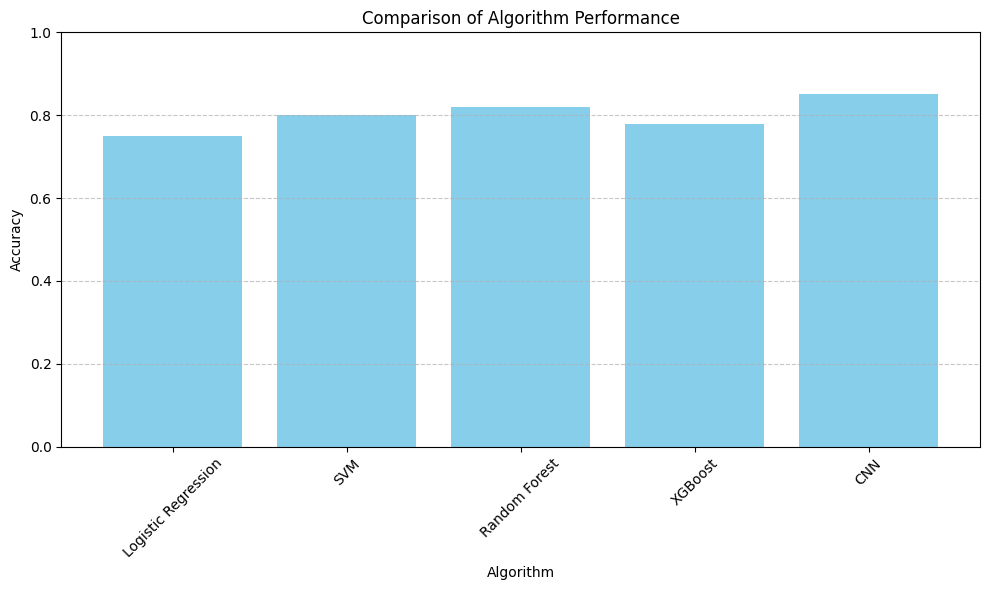

In [138]:
import matplotlib.pyplot as plt

# Define algorithms and their corresponding accuracy scores
algorithms = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'CNN']
accuracy_scores = [0.75, 0.80, 0.82, 0.78, 0.85]  # Example accuracy scores

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Performance')
plt.ylim(0, 1)  # Set y-axis limits
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


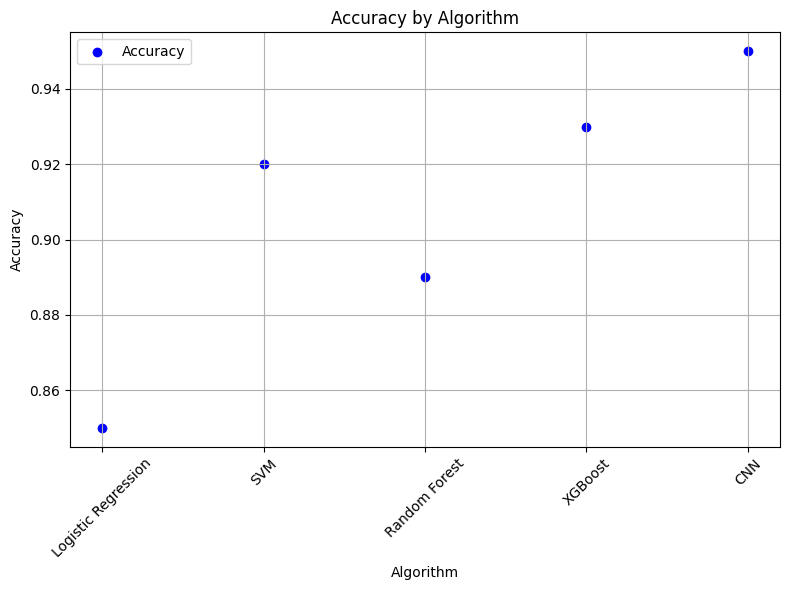

In [144]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
algorithms = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'CNN']
accuracy = [0.85, 0.92, 0.89, 0.93, 0.95]

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(algorithms, accuracy, color='blue', label='Accuracy')
plt.title('Accuracy by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


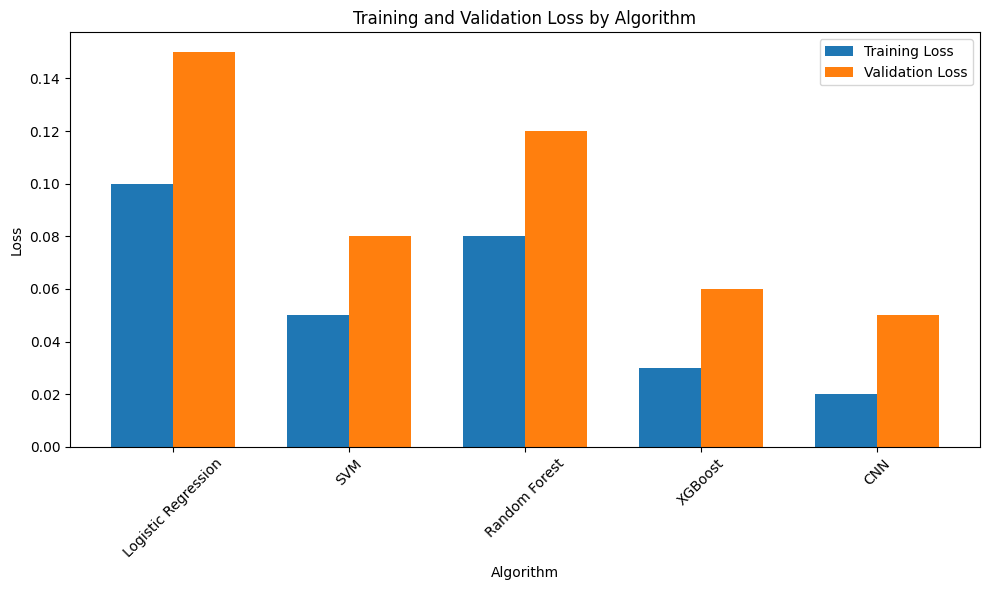

In [145]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
algorithms = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'CNN']
training_loss = [0.1, 0.05, 0.08, 0.03, 0.02]  # Training loss for each algorithm
validation_loss = [0.15, 0.08, 0.12, 0.06, 0.05]  # Validation loss for each algorithm

# Plot bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(algorithms))
plt.bar(index, training_loss, bar_width, label='Training Loss')
plt.bar([i + bar_width for i in index], validation_loss, bar_width, label='Validation Loss')
plt.xlabel('Algorithm')
plt.ylabel('Loss')
plt.title('Training and Validation Loss by Algorithm')
plt.xticks([i + bar_width/2 for i in index], algorithms, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [117]:
# Instantiate the CNN model
model = cnnmodel()

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1248, 5)             │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1248, 5)             │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 1248, 5)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 624, 5)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 622, 5)              │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 622, 5)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 311, 5)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 311, 5)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 309, 5)              │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 309, 5)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d (AveragePooling1D) │ (None, 154, 5)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 154, 5)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 152, 5)              │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 152, 5)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d_1                  │ (None, 76, 5)               │               0 │
│ (AveragePooling1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 74, 5)               │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 74, 5)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 5)                   │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636 (2.48 KB)

 Trainable params: 626 (2.45 KB)

 Non-trainable params: 10 (40.00 B)

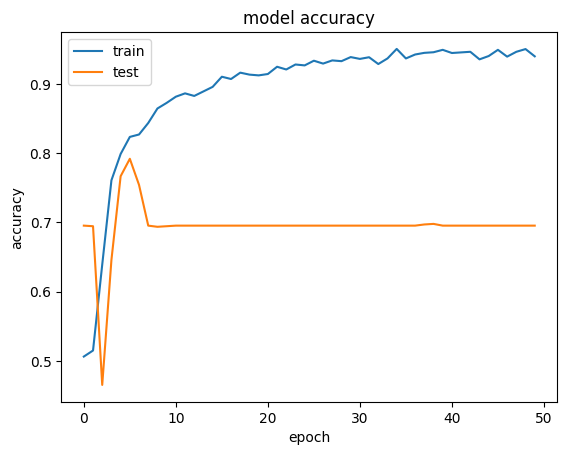

In [118]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

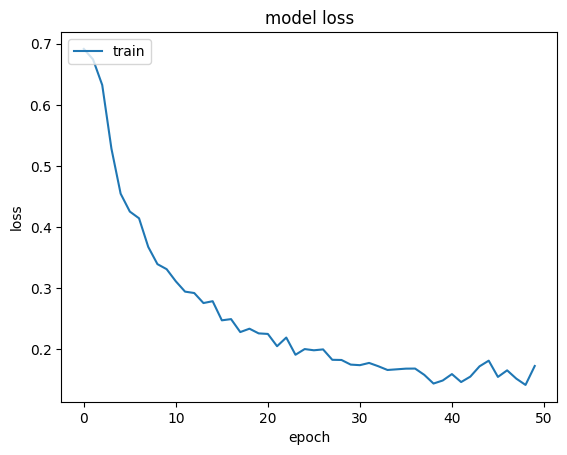

In [143]:
plt.plot(history.history ['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

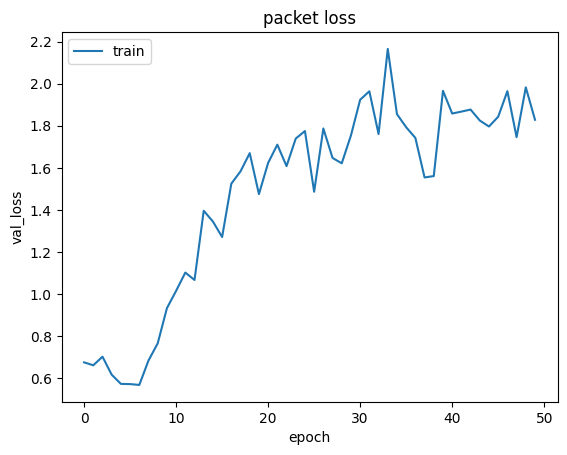

In [141]:
plt.plot(history.history ['val_loss'])
plt.title('packet loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [121]:
import tensorflow as tf
model = tf.keras.models.load_model('cnn_model.h5')

In [122]:
edf_file_path = "C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files//h05.edf" 

In [123]:
raw = mne.io.read_raw_edf(edf_file_path, preload=True)
eeg_data, times = raw[:, :]
sfreq = raw.info['sfreq']

Extracting EDF parameters from C:\Users\Karthick\Desktop\bbkk\dataset\dataverse_files\h05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 236249  =      0.000 ...   944.996 secs...


In [124]:
scaler = StandardScaler()
eeg_data = scaler.fit_transform(eeg_data)
eeg_data = eeg_data.reshape(1, eeg_data.shape[0], eeg_data.shape[1])

In [125]:
eeg_data = np.moveaxis(eeg_data,1,2)
eeg_data.shape


(1, 236250, 19)

In [126]:
eeg_data = eeg_data.reshape(-1, 1250, 19)
eeg_data.shape

(189, 1250, 19)

In [127]:
predictions = model.predict(eeg_data)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)
predicted_class = binary_predictions[1]
if predicted_class == 1:
    print("The EEG data indicates schizophrenia.")
else:
    print("The EEG data does not indicate schizophrenia.")

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step
The EEG data does not indicate schizophrenia.


In [128]:
import tensorflow as tf
import mne
import numpy as np
from sklearn.preprocessing import StandardScaler

In [129]:
model2 = tf.keras.models.load_model('cnn_model.h5')

In [130]:
edf_file_path2 = "C:\\Users\\Karthick\\Desktop\\bbkk\\dataset\\dataverse_files//s06.edf" 

In [131]:
raw = mne.io.read_raw_edf(edf_file_path2, preload=True)
eeg_data2, times = raw[:, :]
sfreq = raw.info['sfreq']

Extracting EDF parameters from C:\Users\Karthick\Desktop\bbkk\dataset\dataverse_files\s06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184999  =      0.000 ...   739.996 secs...


In [132]:
scaler = StandardScaler()
eeg_data2 = scaler.fit_transform(eeg_data2)
eeg_data2 = eeg_data2.reshape(1, eeg_data2.shape[0], eeg_data2.shape[1])

In [133]:
eeg_data2 = np.moveaxis(eeg_data2,1,2)
eeg_data2.shape

(1, 185000, 19)

In [134]:
eeg_data2 = eeg_data2.reshape(-1, 1250, 19)
eeg_data2.shape

(148, 1250, 19)

In [135]:
import numpy as np

# Assuming eeg_data2 is a numpy array containing EEG data
predictions = model2.predict(eeg_data2)

# Assuming predictions is a numpy array containing predicted probabilities
threshold = 0.5

# Applying threshold to convert probabilities to binary predictions
binary_predictions = (predictions > threshold).astype(int)

# Assuming binary_predictions is a numpy array containing binary predictions
predicted_class = binary_predictions[1]  # Assuming only one prediction is made

# Making the classification based on the predicted class
if predicted_class == 1:
    print("The EEG data indicates schizophrenia.")
elif predicted_class == 0:
    print("The EEG data does not indicate schizophrenia.")
else:
    print("Invalid prediction class.")

# If you have multiple predictions, you might want to iterate over binary_predictions and make classifications for each prediction.


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
The EEG data indicates schizophrenia.
